In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel('/content/amazon_alexa.xlsx')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1


In [ ]:
df_reviews = df[['rating', 'verified_reviews', 'feedback']]
df_reviews.head()

,rating,verified_reviews,feedback
0,5,Love my Echo!,1
1,5,Loved it!,1
2,4,"Sometimes while playing a game, you can answer...",1
3,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,Music,1


1. Plot a graph of Positive and Negative Feedback (1 = Positive
Feedback, 0 = Negative Feedback)


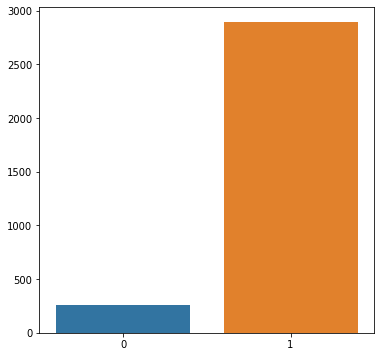

In [ ]:
feedback_count = df_reviews['feedback'].value_counts().sort_index()
fig = plt.figure(figsize=(6, 6))
axes = sns.barplot(x = feedback_count.index, y = feedback_count.values)


(ii) Plot the graph of Ratings distibution.

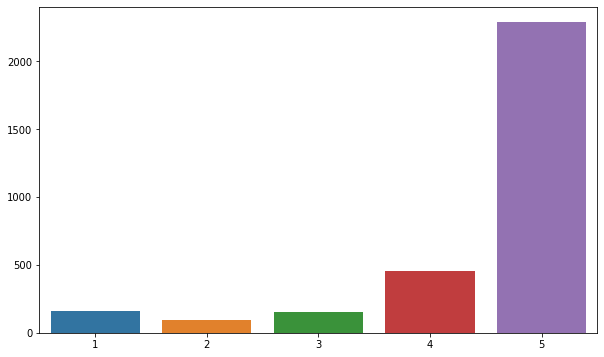

In [ ]:
ratings_count = df_reviews['rating'].value_counts().sort_index()
fig = plt.figure(figsize=(10, 6))
axes = sns.barplot(x = ratings_count.index, y = ratings_count.values)

(iii) Convert the review text into lowercase


In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
df_reviews['verified_reviews'] = df_reviews['verified_reviews'].str.lower()
df_reviews['verified_reviews']

0                                           love my echo!
1                                               loved it!
2       sometimes while playing a game, you can answer...
3       i have had a lot of fun with this thing. my 4 ...
4                                                   music
                              ...                        
3145    perfect for kids, adults and everyone in betwe...
3146    listening to music, searching locations, check...
3147    i do love these things, i have them running my...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

(iv) Remove all punctuations from review text.

In [ ]:
df_reviews['verified_reviews'] = df_reviews['verified_reviews'].str.replace(r'[^\w\s]+', '', regex=True)
df_reviews['verified_reviews']


0                                            love my echo
1                                                loved it
2       sometimes while playing a game you can answer ...
3       i have had a lot of fun with this thing my 4 y...
4                                                   music
                              ...                        
3145      perfect for kids adults and everyone in between
3146    listening to music searching locations checkin...
3147    i do love these things i have them running my ...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

(v) Remove emoticons and emojis from the text

In [ ]:
df_reviews = df_reviews.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df_reviews

,rating,verified_reviews,feedback,tokenized_reviews
0,5,love my echo,1,"['Love', 'my', 'Echo', '!']"
1,5,loved it,1,"['Loved', 'it', '!']"
2,4,sometimes while playing a game you can answer ...,1,"['Sometimes', 'while', 'playing', 'a', 'game',..."
3,5,i have had a lot of fun with this thing my 4 y...,1,"['I', 'have', 'had', 'a', 'lot', 'of', 'fun', ..."
4,5,music,1,['Music']
...,...,...,...,...
3145,5,perfect for kids adults and everyone in between,1,"['Perfect', 'for', 'kids', ',', 'adults', 'and..."
3146,5,listening to music searching locations checkin...,1,"['Listening', 'to', 'music', ',', 'searching',..."
3147,5,i do love these things i have them running my ...,1,"['I', 'do', 'love', 'these', 'things', ',', 'i..."
3148,5,only complaint i have is that the sound qualit...,1,"['Only', 'complaint', 'I', 'have', 'is', 'that..."


(vi) Tokenize the review text into words.

In [ ]:
import nltk
nltk.download('punkt')
df_reviews['tokenized_reviews'] = df_reviews.apply(lambda row: nltk.word_tokenize(row['verified_reviews']), axis=1)
df_reviews['tokenized_reviews']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                                        [love, my, echo]
1                                             [loved, it]
2       [sometimes, while, playing, a, game, you, can,...
3       [i, have, had, a, lot, of, fun, with, this, th...
4                                                 [music]
                              ...                        
3145    [perfect, for, kids, adults, and, everyone, in...
3146    [listening, to, music, searching, locations, c...
3147    [i, do, love, these, things, i, have, them, ru...
3148    [only, complaint, i, have, is, that, the, soun...
3149                                               [good]
Name: tokenized_reviews, Length: 3150, dtype: object

(vii) Remove the stopwords from the tokenized text.

In [ ]:
stop_words = stopwords.words('english')

def remove_stopwords(text):
  words = []
  for word in text:
    if word not in stop_words:
      words.append(word)
  text = ' '.join(words)
  return text


df_reviews['without_stopwords'] = df_reviews['tokenized_reviews'].apply(remove_stopwords)
df_reviews[['without_stopwords', 'tokenized_reviews']].head()

,without_stopwords,tokenized_reviews
0,love echo,"[love, my, echo]"
1,loved,"[loved, it]"
2,sometimes playing game answer question correct...,"[sometimes, while, playing, a, game, you, can,..."
3,lot fun thing 4 yr old learns dinosaurs contro...,"[i, have, had, a, lot, of, fun, with, this, th..."
4,music,[music]


(viii) Perform stemming & lemmatization on the review text.

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
l = WordNetLemmatizer()

def stemmer_lemmatizer(text):
  words = []
  for word in text.split():
    w = ps.stem(word)
    w = l.lemmatize(word)
    words.append(w)
  text = ' '.join(words)
  return text

df_reviews['without_stopwords'] = df_reviews['without_stopwords'].apply(stemmer)
df_reviews['without_stopwords']


0                                               love echo
1                                                    love
2       sometim play game answer question correctli al...
3       lot fun thing 4 yr old learn dinosaur control ...
4                                                   music
                              ...                        
3145                            perfect kid adult everyon
3146    listen music search locat check time look weat...
3147    love thing run entir home tv light thermostat ...
3148    complaint sound qualiti isnt great mostli use ...
3149                                                 good
Name: without_stopwords, Length: 3150, dtype: object

(ix) Perform the word vectorization on review text using Bag of
Words technique.

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

vectoriser = CountVectorizer()
X = vectoriser.fit_transform(df_reviews['without_stopwords'])

print(X.toarray())
X.shape





[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(3150, 3279)

(x) Create representation of Review Text by calculating Term
Frequency and Inverse Document Frequency (TF-IDF)

In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer()
X = vectoriser.fit_transform(df_reviews['without_stopwords'])

print(X.toarray())
X.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(3150, 3279)